In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy 

In [2]:
times, masses, positions, velocities =np.load('noisy_sunearth.npy')

In [3]:
t=times/24/60/60
x_Earth=positions[1,0,:]

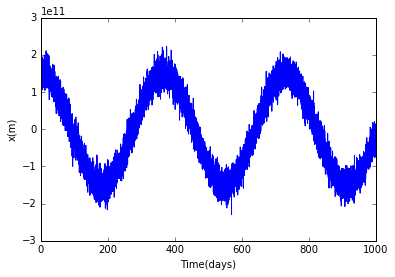

In [4]:
plt.plot(t,x_Earth)
plt.ylabel('x(m)')
plt.xlabel('Time(days)')

In [5]:
def generateModel(period):
    phase=2*np.pi*t/period
    a=1.496e11
    return a*np.cos(phase)

In [6]:
def calculateBadness(period,plot=False):
    d=x_Earth
    m=generateModel(period)
    b=np.sum((d-m)**2)
    if plot:
        plt.plot(t,d)
        plt.plot(t,m,color="orange", linewidth=5, alpha=0.7)
        plt.ylabel("x(m)")
        plt.xlabel('Time (days)')
        template='P={:.1f} days, $\sum(data-model)^2$ ={:.3}'
        plt.title(template.format(period,b))
        plt.show()
    return b

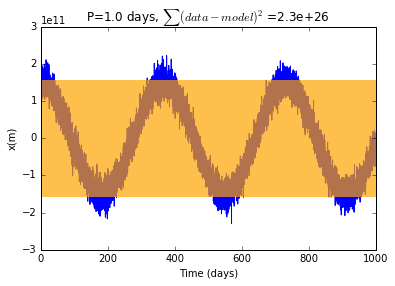

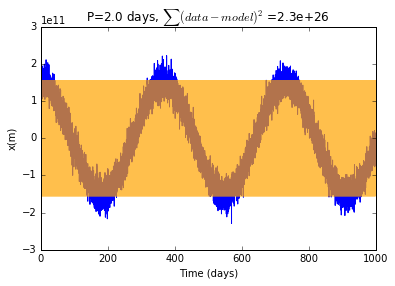

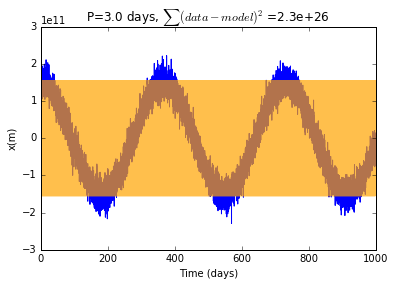

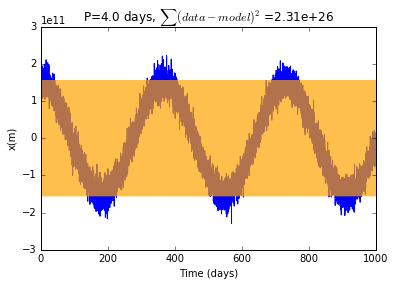

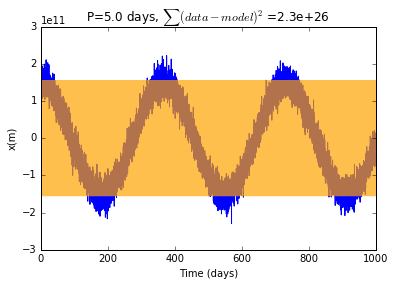

In [7]:
for x in range(5):
    calculateBadness((x+1),plot=True)

In [8]:
bad=[] #making a list that i will fill later
p=np.linspace(1,1000,1000)

for y in range(len(p)): #looping over 1000 periods ranging from 1-1000 days
    bads=calculateBadness(p[y])
    bad.append(bads) 
    

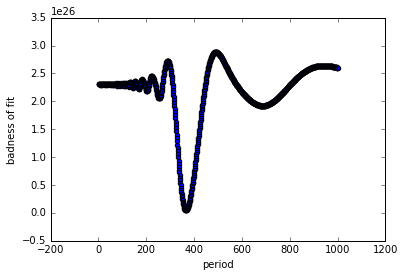

In [9]:
p=np.linspace(1,1000,1000)
plt.scatter(p,bad)
plt.xlabel("period")
plt.ylabel("badness of fit")


In [10]:
Minbad=np.argmin(bad)
per=p[Minbad] 
print "The period with the best fit is {}".format(per)
#this makes sense! It is close to the orbital period of the Earth!!!

The period with the best fit is 366.0
